### Solution to problem 1:

Let us first show that the probablity that the algorithms outputs $1$ is $\frac{c_yp_y}{c_xp_x + c_yp_y}$.

Suppose before returning $1$, we went to line 1 $r$ times after reaching line 7 and $s$ times after reaching line 13. So to get the total probability $p$, we need to sum over all possible combinations of $r$ and $s$. So, we have,
$$p= \frac{p_yc_y}{c_x+c_y}\sum_{r=0}^{\infty} \sum_{s=0}^{\infty} {{r+s} \choose s} \Big(\frac{c_y(1-p_y)}{c_x+c_y}\Big)^r \Big(\frac{c_x(1-p_x)}{c_x+c_y}\Big)^s$$

$$\implies p = \frac{p_yc_y}{c_x+c_y}\sum_{r=0}^{\infty} \Big(\frac{c_y(1-p_y)}{c_x+c_y}\Big)^r \sum_{s=0}^{\infty} {{r+s} \choose s}  \Big(\frac{c_x(1-p_x)}{c_x+c_y}\Big)^s$$

Now, we will make use of the following identity $\sum_{k=0}^{\infty} {{n+k} \choose k} x^k = \frac{1}{(1-x)^{n+1}}$ to conclude

$$ p = \frac{p_yc_y}{p_xc_x+c_y}\sum_{r=0}^{\infty} \Big(\frac{c_y(1-p_y)}{p_xc_x+c_y}\Big)^r = \frac{c_yp_y}{p_xc_x + p_yc_y}$$

Now we need to find the probabilty distribution of the number of iterations it takes to give an output. Let $X$ be the random variable denoting the number of interations it takes to give an output. We need to find $P(X=k)$. Let $P(X=k | i )$ denote the conditional probability that the output is $i$ after $k$ iterations. We have, 
$$ P(X=k)=P(X=k | 1) + P(X=k | 0) $$

$$P(X=k)=\frac{c_yp_y}{c_x+c_y}\sum_{r=0}^{k-1} {{k-1} \choose r} \Big(\frac{c_y(1-p_y)}{c_x+c_y}\Big)^r \Big(\frac{c_x(1-p_x)}{c_x+c_y}\Big)^{k-1-r} + \frac{c_xp_x}{c_x+c_y}\sum_{r=0}^{k-1} {{k-1} \choose r} \Big(\frac{c_y(1-p_y)}{c_x+c_y}\Big)^r \Big(\frac{c_x(1-p_x)}{c_x+c_y}\Big)^{k-1-r}$$

$$P(X=k) = \frac{c_xp_x +c_yp_y}{{(c_x+c_y)}^k} {\big(c_x(1-p_x) + c_y(1-p_y) \big)}^k$$

### Solution to problem 2:

I have shown the plot for the case of $p=2$ and I am not sure how am I supposed to show my samples for the rest of the values of $p$ so I have just shown $10$ samples for each of them. 

The idea behind sampling points uniformly from a $p$-dimensional sphere is very similar to the one for a circle. What changes is the value of $c$ in our accept-reject algorithm. We have, $$c_p = \frac{2^p \Gamma({\frac{p}{2}+1})}{\pi^{\frac{p}{2}}}$$ which is an increasing function of $p$. So, the number of iterations that we need before we accept a proposal keeps on increasing with increasing values of $p$.

In [1]:
using Distributions
using StatsPlots

In [2]:
function nDimSphere(_p)
    while true
        p = _p
        x = []
        for i in 1:p
            push!(x, rand(Uniform(-1,1)))
        end
        z = 0
        for i in 1:p
            z = z + x[i]*x[i]
        end
        if z<=1
            return x
        end
    end
end

nDimSphere (generic function with 1 method)

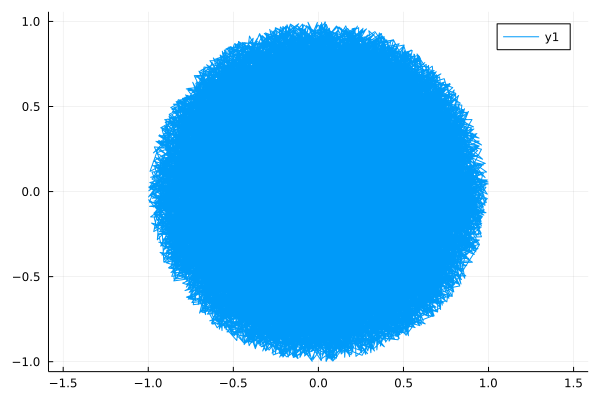

In [165]:
p=2
v = []
no_of_samples = 10000

while no_of_samples>0
    push!(v, nDimSphere(p))
    global no_of_samples = no_of_samples - 1
end

x1 = []
x2 = []
for x in v
    push!(x1, x[1])
    push!(x2, x[2])
end

L = plot(x1, x2, aspect_ratio = 1)
display(L)

In [170]:
p=3
v = []
no_of_samples = 10

while no_of_samples>0
    push!(v, nDimSphere(p))
    global no_of_samples = no_of_samples - 1
end
v

10-element Vector{Any}:
 Any[0.06578969675187984, 0.4932201056253782, 0.7543828128721133]
 Any[0.7703637509413928, -0.13211031633726833, 0.08951228902890085]
 Any[-0.0477847879396327, 0.6412208030077422, -0.4252552138159009]
 Any[-0.5564642059177594, 0.22198503618800114, -0.2081989057044975]
 Any[-0.5419949957682828, 0.41216409610326465, 0.44556417771987844]
 Any[0.5887690677391748, 0.8064012106964924, -0.05085881278760995]
 Any[0.8503153315239951, -0.13748132896919207, -0.2812279335913739]
 Any[0.17860206907626397, 0.34368013868755964, -0.07170914825518748]
 Any[0.620691406260041, -0.1855669369496007, -0.05057341337811616]
 Any[-0.23382489085657587, 0.1841061029062323, 0.006840020248334966]

In [171]:
p=4
v = []
no_of_samples = 10

while no_of_samples>0
    push!(v, nDimSphere(p))
    global no_of_samples = no_of_samples - 1
end
v

10-element Vector{Any}:
 Any[0.2331074630069705, 0.28310950210895003, -0.526894041830066, 0.686519570510959]
 Any[0.35825114698758753, -0.03756782625643673, 0.7270676431030947, 0.2892746537902995]
 Any[-0.19034951991786553, 0.4579747475628877, 0.2700277592902367, 0.6459692073063965]
 Any[0.3369751209588321, -0.329397495397425, -0.5365483048050441, 0.4227014846695649]
 Any[0.0480665968196452, 0.2929454154780875, 0.2593268324800957, -0.6697193752017285]
 Any[-0.1421052012352506, 0.10802169731184152, -0.5406572304915556, -0.4913827540269877]
 Any[0.6700360203860614, 0.28380012544388045, -0.16272778873018368, 0.48809214440986226]
 Any[0.15854873419531224, 0.11221367561586515, 0.5539973857911358, -0.3116041795882971]
 Any[0.44101686106601523, -0.5583381295215641, 0.2509359728823948, -0.4435448311723027]
 Any[0.791494030553995, 0.03940923509206895, 0.049963298459855476, -0.3075894641754444]

In [172]:
p=5
v = []
no_of_samples = 10

while no_of_samples>0
    push!(v, nDimSphere(p))
    global no_of_samples = no_of_samples - 1
end
v

10-element Vector{Any}:
 Any[-0.42639595976595324, -0.5476451595922764, 0.31103134517611464, 0.3668413726802573, -0.27075064045482655]
 Any[0.5052729466947143, -0.28139165633832386, -0.6712359397856327, -0.22513290373692696, -0.22614768747456981]
 Any[0.043818445823072594, 0.2732142526446557, -0.5119720809099739, -0.23883184684102732, 0.7571880724414992]
 Any[0.39591076068420916, -0.08677773908633846, -0.019825310201863733, -0.4772534450083996, 0.7384427824829638]
 Any[-0.5801309409018769, -0.27059313536390794, 0.2194895297136088, -0.0400219146872729, -0.23996507198725414]
 Any[-0.10161885687696914, 0.032469359426045674, -0.37721840710638643, 0.0006145897805676093, 0.33096482552178896]
 Any[0.7889113574306093, 0.13120403406804693, -0.11637093664724629, 0.25826336672510797, -0.21075542788730273]
 Any[0.034766349060318724, 0.09950220988975689, 0.24548267122701395, -0.6448033190704616, -0.43366685659261384]
 Any[-0.12906410761820775, 0.3957801727743182, -0.6363886178807068, -0.34280396410

In [173]:
p=6
v = []
no_of_samples = 10

while no_of_samples>0
    push!(v, nDimSphere(p))
    global no_of_samples = no_of_samples - 1
end
v

10-element Vector{Any}:
 Any[-0.4510848102261851, -0.3196687700080365, -0.4050743884088952, -0.29598754686826023, 0.03177944661879106, -0.1721385441006027]
 Any[-0.5314640418820118, 0.6322417874591695, 0.056847060395951665, -0.17122067090018556, -0.12394493220462888, 0.007695874832653438]
 Any[0.3267467193051292, -0.052371524209102294, 0.4352450953154885, -0.46985768019624263, 0.1816584688009084, 0.3870312460279295]
 Any[-0.057291278038549276, -0.10295700191433932, 0.2545554362520903, -0.1434574964549622, -0.5877390423392304, 0.6394195595346357]
 Any[0.06615809736541634, 0.19694276702190106, -0.0017834307137127858, -0.020221907346226864, 0.5299016254373017, 0.7489649631195374]
 Any[0.5393968131460958, -0.15656609691531775, 0.0427947338715744, -0.6871761892138442, -0.2568703530389089, -0.08374751092705646]
 Any[-0.15694057291891594, 0.3499072275906072, 0.3696669141106499, -0.05563757441452166, -0.24772580511399678, 0.5589812009837964]
 Any[-0.32043398850691673, -0.37104222575695633, -0.

### Solution to problem 3:
    
I have made a sampler for standard normal distribution from scratch and used it to sample from a truncaated standard normal distributiont. However if you still wish to see what happens if we use the inbuilt SND sampler, uncomment the commented line in definition of `truncatedSND()`.

The theoretical value of mean and variance for $a = 1$ are $0$ and $0.291125$ respectively while the mean and variance that I am getting from my samples are $0.0037087097839575323$ and $0.29324051004222623$ respectively which are in close aggrement with each other suggesting that my samples are good.

Similarly, for $a = 4$, the theoretical mean and variance are $0$ and $0.89201122697$ respectively while the mean and variance of my samples are $0.01030261849481327$ and $0.9951652426064821$ respecctively, which again are in close aggrement.

For the case when $a=1$, we are near the top part of the standard normal distribution and there the probability density does not change much which is evident from the small value of variance. While for the case when $a=4$, we get pretty much the entire standard normal distribution as the interval $(-3,3)$ contains more than 97% of the standard normal distribution hence the variance is close to $1$ which is the variance for the case of a standard normal distribution.

##### NOTE :
I calculated the theoretical value of mean and variance using the formulas given [here](https://en.wikipedia.org/wiki/Truncated_normal_distribution). 

In [159]:
function CauchyDist()
    U = rand(Uniform(0,1))
    X = tan(pi*(U-0.5))
    return X
end

CauchyDist (generic function with 1 method)

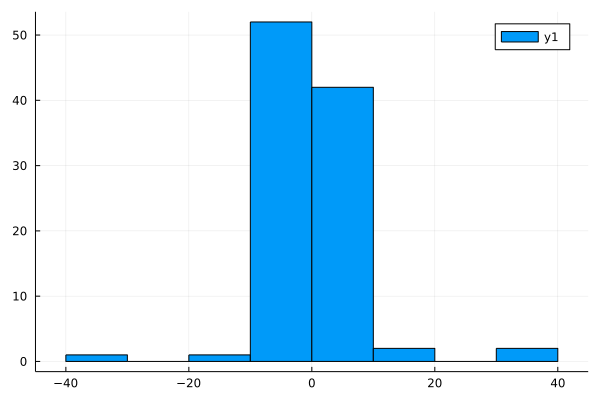

In [153]:
array_cauchy= []
for i in 1:100
    push!(array_cauchy, CauchyDist())
end
p = histogram(array_cauchy, bins = 7)
display(p)

In [154]:
function _h(x)
    y = (sqrt(pi/2)*(1+x*x)*exp(-x*x/2))/1.80
    return y
end

function SND()
    while true
        U = rand(Uniform(0,1))
        Y = CauchyDist()
        if U <= _h(Y)
            return Y
        end
    end
end

SND (generic function with 1 method)

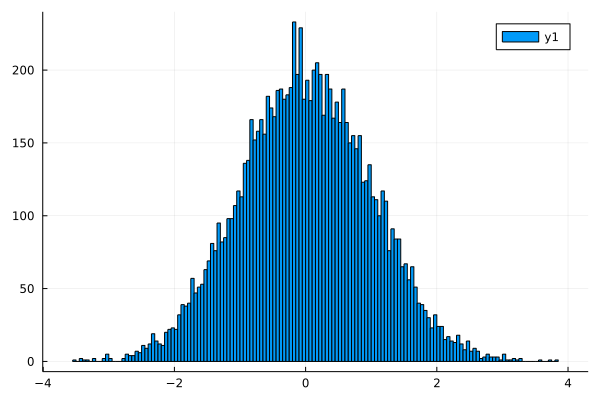

In [155]:
array = []
for i in 1:10000
    push!(array, SND())
end
p = histogram(array, bins = 200)
display(p)

In [156]:
function truncatedSND(_a)
    while true
        Y = SND()
        #Y = rand(Normal(0,1))
        if (Y*Y<=_a*_a)
            return Y
        end
    end
end

truncatedSND (generic function with 1 method)

0.29324051004222623
0.0037087097839575323


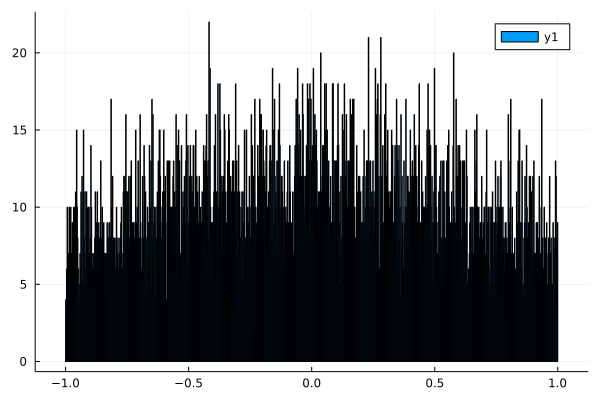

In [157]:
array= []
_mean = 0
mean_sq = 0
for i in 1:10000
    z = truncatedSND(1)
    _mean = _mean + z
    mean_sq = mean_sq + z*z
    push!(array, z)
end
_mean = _mean/10000
variance_of_samples = mean_sq/10000 - (_mean*_mean)
println(variance_of_samples)
println(_mean)
h = histogram(array, bins = 1000)
display(h)

0.9951652426064821
0.01030261849481327


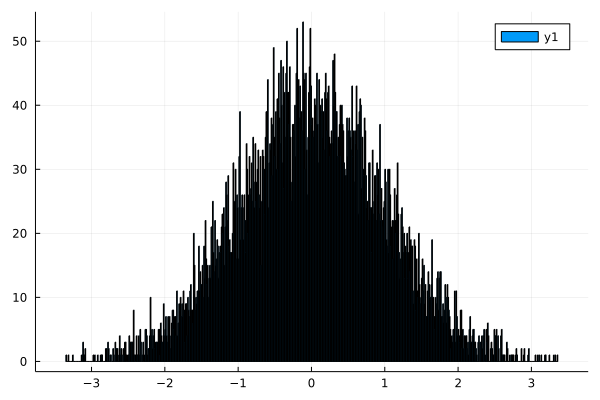

In [164]:
array= []
_mean = 0
mean_sq = 0
for i in 1:10000
    z = truncatedSND(4)
    _mean = _mean + z
    mean_sq = mean_sq + z*z
    push!(array, z)
end
_mean = _mean/10000
variance_of_samples = mean_sq/10000 - (_mean*_mean)
println(variance_of_samples)
println(_mean)
h = histogram(array, bins = 1000)
display(h)